<a href="https://colab.research.google.com/github/jovanadobreva/Labs-I2DS/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font  color='Orange'>Data Preparation & KNN Classification</font>


# <font color = 'Orange'> Read your Dataset (.csv)</font>
run the code below for downloading the dataset

In [1]:
!gdown 1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
import pandas as pd

df = pd.read_csv('./data/diabetes.csv')

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,0.0,137,40,35.0,168,43.1,2.288,33,1


# <font color = 'Orange'> Data preprocessing </font>

Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Input columns: Pregnancies, Glucose, BloodPressure,SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

Output columns: Outcome 0-->doesn't have diabetes / 1--> has diabetes

## <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset.

In [7]:
#add your code
null_df = df.isnull().sum()
percentage_missing = null_df / len(df) * 100
percentage_missing = percentage_missing.reset_index().rename(columns = {"index": "Feature", 0:"Percentage Missing"})
percentage_missing

,Feature,Percentage Missing
0,Pregnancies,1.822917
1,Glucose,0.000000
2,BloodPressure,0.000000
3,SkinThickness,1.041667
4,Insulin,0.000000
5,BMI,1.302083
6,DiabetesPedigreeFunction,0.000000
7,Age,0.000000
8,Outcome,0.000000


In [45]:
null_df

Pregnancies                 14
Glucose                      0
BloodPressure                0
SkinThickness                8
Insulin                      0
BMI                         10
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

## <font color = 'Orange'> Find reasons for the missing values</font>


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

Visualize the missing values using Missingno library

<Axes: >

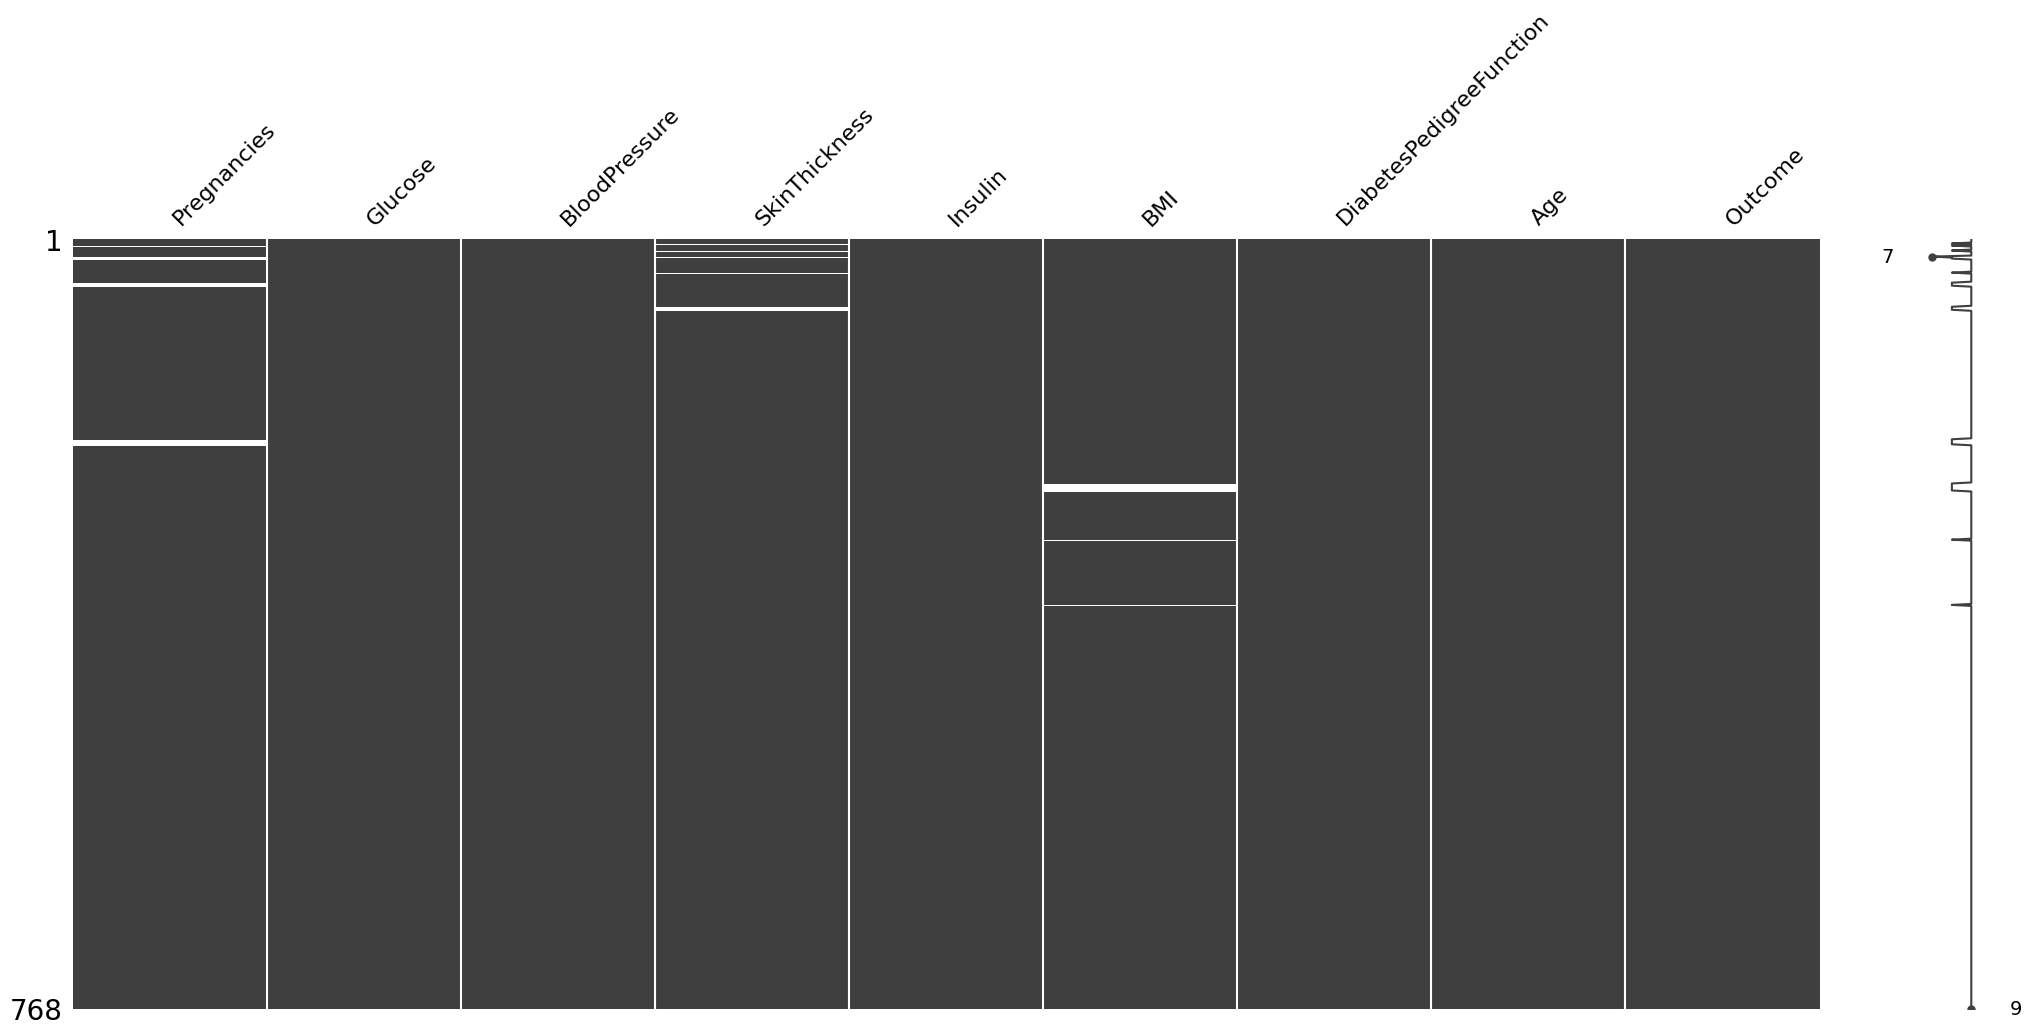

In [8]:
#add your code
msno.matrix(df)

<Axes: >

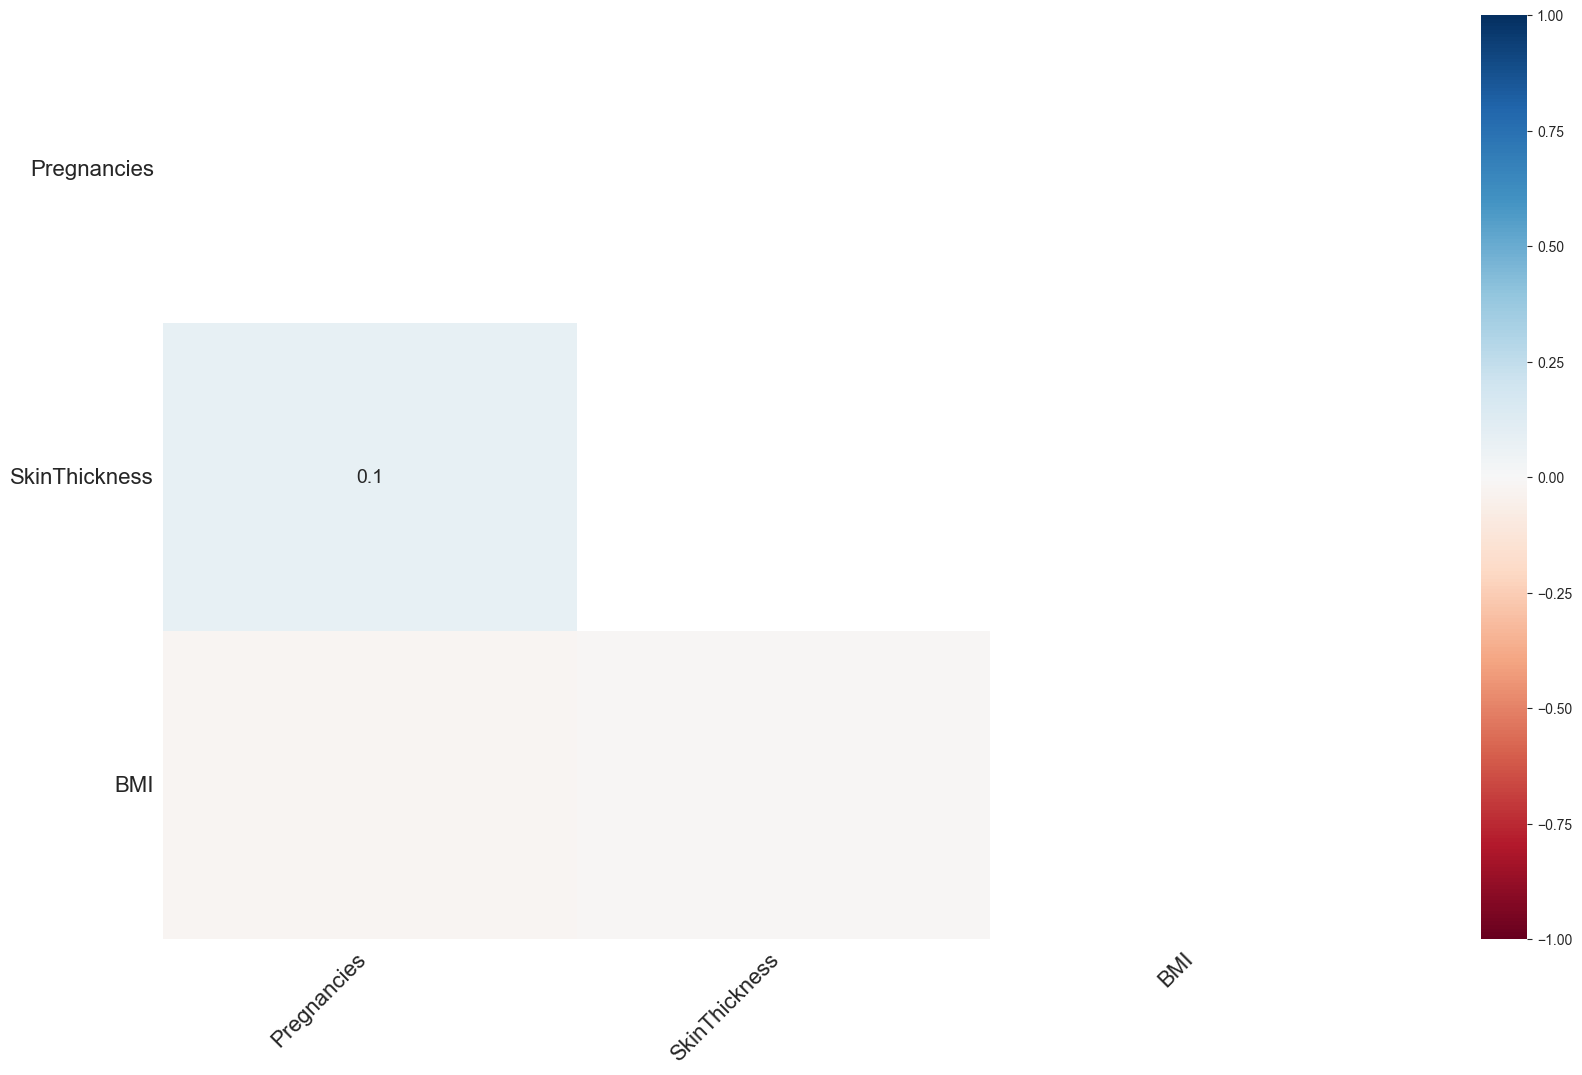

In [33]:
msno.heatmap(df)

<Axes: >

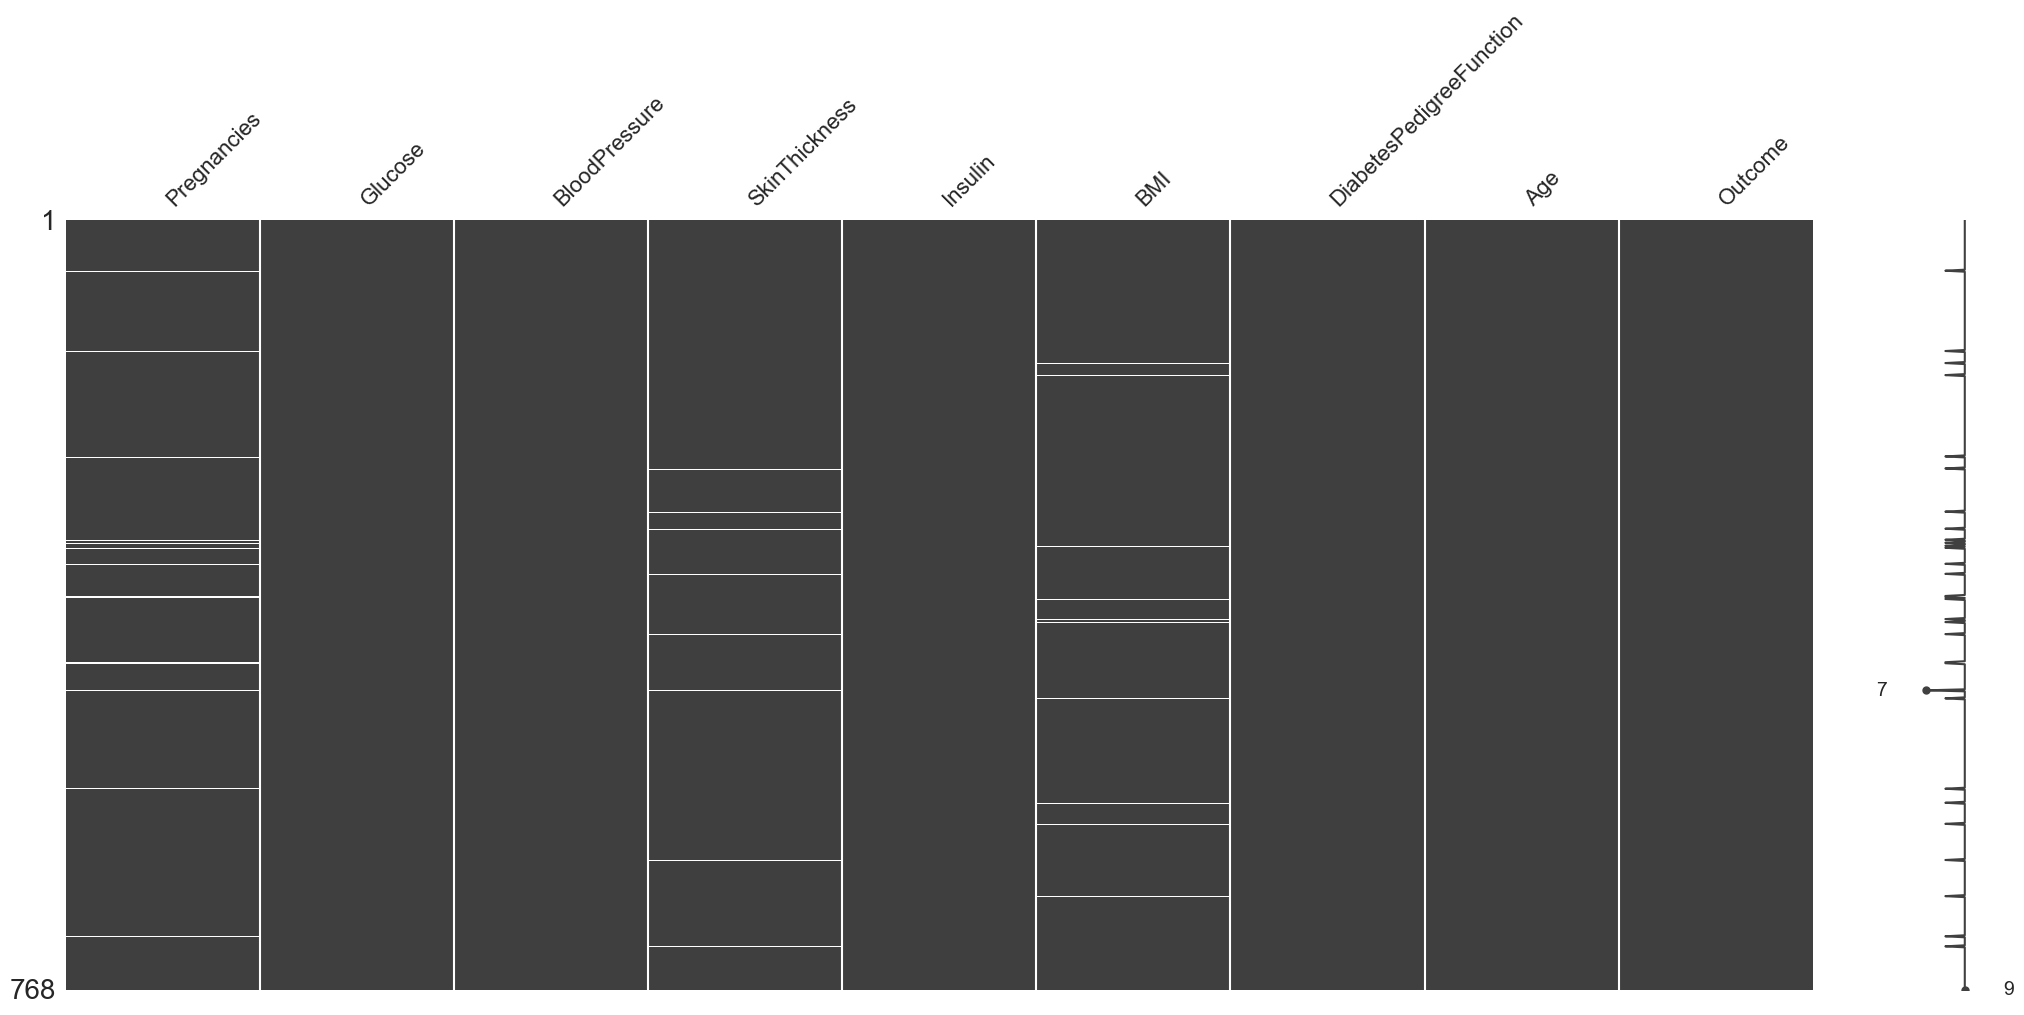

In [39]:
#add your code
tmp = df[["Pregnancies", "BMI", "SkinThickness"]]
msno.matrix(df.sort_values("Age"))

In [41]:
tmp.isnull().corr()

,Pregnancies,BMI,SkinThickness
Pregnancies,1.000000,-0.015651,0.081885
BMI,-0.015651,1.000000,-0.011784
SkinThickness,0.081885,-0.011784,1.000000


<Axes: >

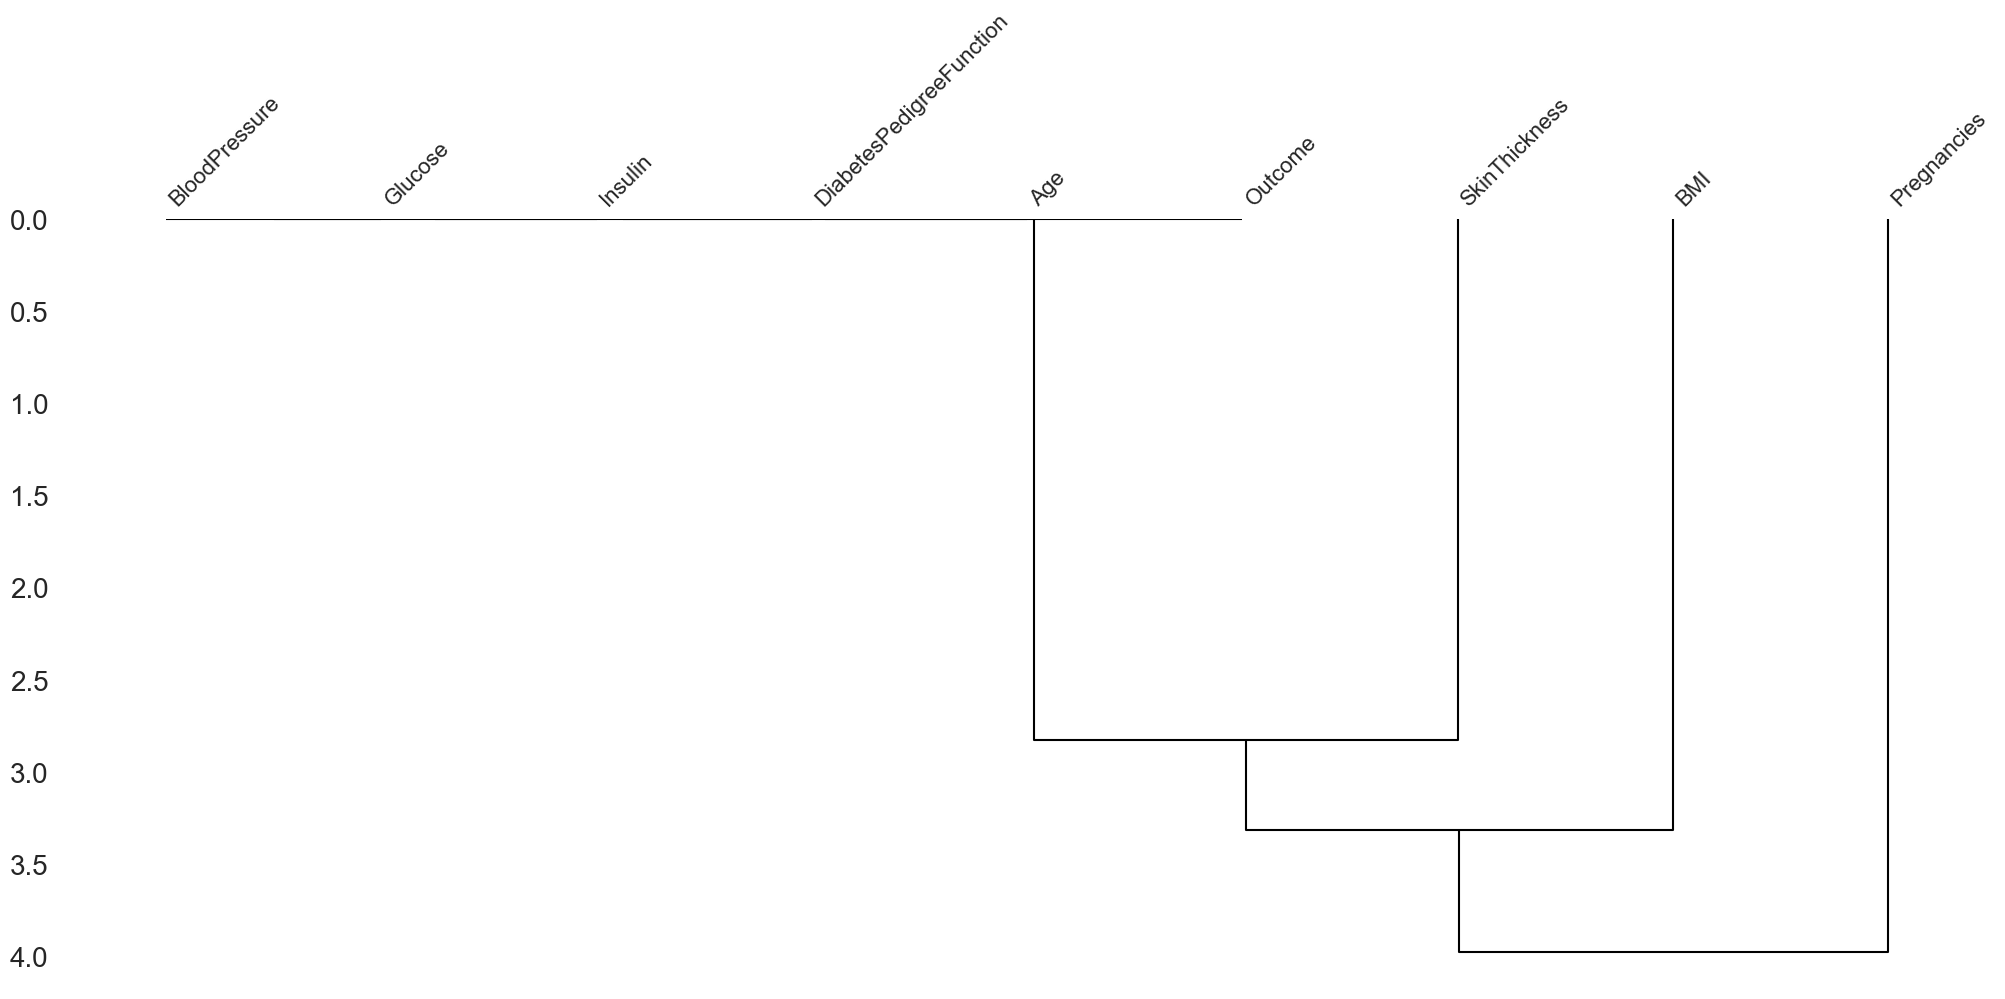

In [44]:
msno.dendrogram(df)

## <font color = 'Orange'>Handle the missing values</font>

In [47]:
#add your code
df.dropna(subset=["Pregnancies", "BMI", "SkinThickness"],axis=0,inplace=True)
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## <font color = 'Orange'>Save the new Dataset(.csv) without the missing values</font>

In [49]:
#add your code
df.to_csv("./data/no_missing_diabetes.csv")

Print the first rows of your final Dataset

In [50]:
#add your code
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,0.0,137,40,35.0,168,43.1,2.288,33,1


# <font color='orange'>KNN Classification</font>

##<font color = 'Orange'>Split the dataset for training and testing in ratio 80:20 </font>


In [51]:
#add your code
from sklearn.model_selection import train_test_split


In [52]:
X = df.drop(columns="Outcome", axis=1)
Y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0, shuffle=True)

In [55]:
y_train

611    1
421    0
533    0
276    1
663    1
      ..
738    0
213    1
660    0
590    1
715    1
Name: Outcome, Length: 589, dtype: int64

In [56]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
611,3.0,174,58,22.0,194,32.9,0.593,36
421,2.0,94,68,18.0,76,26.0,0.561,21
533,6.0,91,0,0.0,0,29.8,0.501,31
276,7.0,106,60,24.0,0,26.5,0.296,29
663,9.0,145,80,46.0,130,37.9,0.637,40
...,...,...,...,...,...,...,...,...
738,2.0,99,60,17.0,160,36.6,0.453,21
213,0.0,140,65,26.0,130,42.6,0.431,24
660,10.0,162,84,0.0,0,27.7,0.182,54
590,11.0,111,84,40.0,0,46.8,0.925,45


## <font color = 'Orange'>Initialize the KNN Classification model, and use the fit function for training the model</font>

In [57]:
#add your code
from sklearn.neighbors import KNeighborsClassifier

In [58]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

## <font color = 'Orange'>Predict the outcomes for X test</font>

In [60]:
#add your code
predict = KNN.predict(X_test)

## <font color = 'Orange'>See the model performance, by using sklearn metrics for classification</font>



In [65]:
#add your code
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [69]:
# Tochnost
# Kolku tochno sme pogodile za site dali se bolni ili ne
accuracy = accuracy_score(y_test, predict)
accuracy

0.7567567567567568

In [70]:
# Preciznost
# Kolku tochno sme pogodile deka se bolni od site sho sme rekle deka se bolni
precision = precision_score(y_test, predict, average='binary')  # Use 'macro' or 'weighted' for multiclass
precision

np.float64(0.7)

In [72]:
# Senzitivnost
# Kolku tochno sme pogodile deka se bolni od site sho navistina se bolni
# sme rekle deka se bolni i se bolni / site bolni (site sho se bolni i sme rekle deka se bolni + tie sho se bolni a sme rekle deka se zdravi)
recallScore = recall_score(y_test, predict, average='binary')
recallScore

np.float64(0.5384615384615384)

In [ ]:
# 2 * recallScore + precision / (recallScore + precision) / nekoja sredna vrednost
f1Score = f1_score(y_test, predict, average='binary')
f1Score